In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Handling
import datetime

# File System Operations
import os

In [2]:
# File name only
file_name = "imdb_movie_dataset.csv"

# Load the dataset (file must be in the current working directory)
df = pd.read_csv(file_name)

# Perform EDA
print("\nInitial Dataset Info:")
print(df.info())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


In [3]:
# List of columns to remove
columns_to_remove = ['Rank', 'Description', 'Year', 'Runtime (Minutes)', 'Revenue (Millions)','Votes']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Verify the changes
print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      1000 non-null   object 
 1   Genre      1000 non-null   object 
 2   Director   1000 non-null   object 
 3   Actors     1000 non-null   object 
 4   Rating     1000 non-null   float64
 5   Metascore  936 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB
None

Preview of Updated DataFrame:


,Title,Genre,Director,Actors,Rating,Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",8.1,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",7.0,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",7.3,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",7.2,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",6.2,40.0


In [4]:
df = df.rename(columns={'Title': 'Titles'})
df = df.rename(columns={'Genre': 'genre'})
df = df.rename(columns={'Metascore': 'score'})

print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Titles    1000 non-null   object 
 1   genre     1000 non-null   object 
 2   Director  1000 non-null   object 
 3   Actors    1000 non-null   object 
 4   Rating    1000 non-null   float64
 5   score     936 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB
None

Preview of Updated DataFrame:


,Titles,genre,Director,Actors,Rating,score
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",8.1,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",7.0,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",7.3,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",7.2,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",6.2,40.0


In [5]:
# 1. Check for null or missing values
print("\nChecking for Null Values:")
print(df.isnull().sum())  # Count of missing values in each column

# 2. Check for duplicate rows
print("\nChecking for Duplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

# Display updated dataset info
print("\nUpdated Dataset Info:")
df.info()


Checking for Null Values:
Titles       0
genre        0
Director     0
Actors       0
Rating       0
score       64
dtype: int64

Checking for Duplicate Rows:
Number of duplicate rows: 0

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Titles    1000 non-null   object 
 1   genre     1000 non-null   object 
 2   Director  1000 non-null   object 
 3   Actors    1000 non-null   object 
 4   Rating    1000 non-null   float64
 5   score     936 non-null    float64
dtypes: float64(2), object(4)
memory usage: 54.7+ KB


In [6]:
from sklearn.impute import KNNImputer

# Assuming your DataFrame is named 'df' and the 'score' column has missing values

# 1. Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors for imputation

# 2. Select the column with missing values
X = df[['score']] 

# 3. Fit and transform the data
X_imputed = imputer.fit_transform(X)

# 4. Replace the original column with the imputed values
df['score'] = X_imputed

# Now, the 'score' column in your DataFrame will have the missing values imputed using KNN.

print("\nChecking for Null Values:")
print(df.isnull().sum())  # Count of missing values in each column

print("\nUpdated Dataset Info:")
df.info()


Checking for Null Values:
Titles      0
genre       0
Director    0
Actors      0
Rating      0
score       0
dtype: int64

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Titles    1000 non-null   object 
 1   genre     1000 non-null   object 
 2   Director  1000 non-null   object 
 3   Actors    1000 non-null   object 
 4   Rating    1000 non-null   float64
 5   score     1000 non-null   float64
dtypes: float64(2), object(4)
memory usage: 54.7+ KB


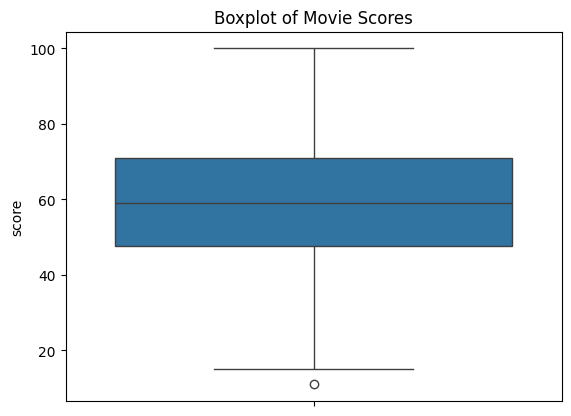

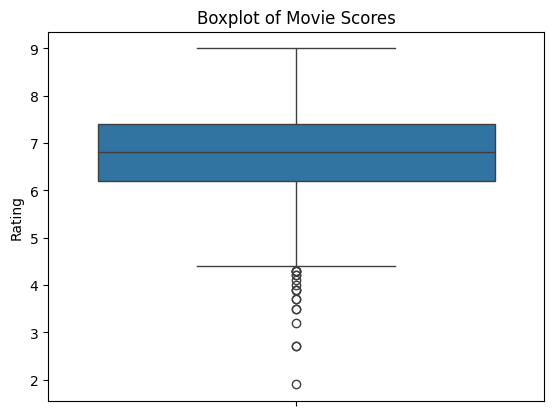

In [9]:
sns.boxplot(df['score'])
plt.title("Boxplot of Movie Scores")
plt.show()

sns.boxplot(df['Rating'])
plt.title("Boxplot of Movie Scores")
plt.show()

In [10]:
# Save the cleaned DataFrame
df.to_csv('Cleaned_imdb_movie_dataset.csv', index=False)